In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from copy import deepcopy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(40, 40, 40)
0
1
6.25


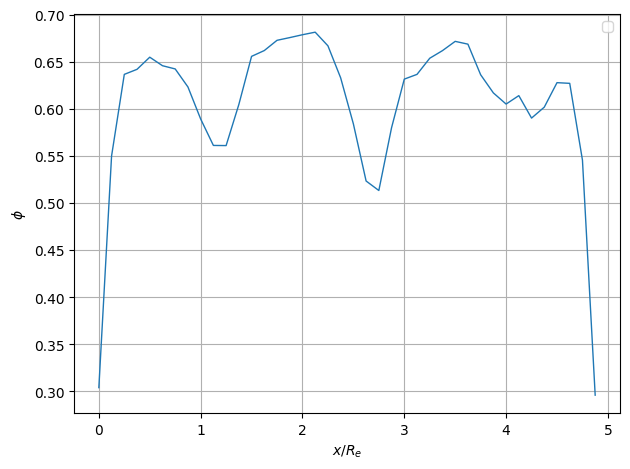

In [8]:
offset=1 #to account for area51

plt.figure(dpi=100)
plt.grid()
y=0

with h5py.File('coord.h5', 'r') as f:
    ##number of beads per polymer
    N=int(f['parameter/reference_Nbeads'][()]) 
    #kappa
    kappa=30/N
    ##number of polymers
    n_polym=int(f['parameter/n_polymers'][()]) 
    n_poly_type=int(f['parameter/n_poly_type'][()]) 
    n_types=int(f['parameter/n_types'][()]) 
    ##box dimensions 
    lxyz=np.array(f['parameter/lxyz'])
    ##box discretization
    nxyz=np.array(f['parameter/nxyz'])
    #discretization
    dxyz=lxyz/nxyz
    #adjust lengths and discretizations
    lxyz=lxyz-2*offset*dxyz
    nxyz=nxyz-2*offset
    #area51
    area51=np.array(f["area51"])
with h5py.File(f'coord_ana.h5', 'r') as f:
    #only load every other frame, the others are not optimized
    phi=np.array(f['density_field'])[50:]
#average phi over time
phi=phi.mean(axis=0)
#box volume
V=np.prod(lxyz)
Nbar=n_polym/V
#cell volume
V_cell=np.prod(dxyz)
#number of accessible cells 
n_cells=int(len(area51[area51==0]))
#field scaling type
scale=n_cells/(N*n_polym)
#reshape density and umbrella field
phi=phi*scale
phi=phi[:,area51==0].reshape(phi.shape[0],nxyz[0],nxyz[1],nxyz[2])
phi_tot=np.sum(phi,axis=0)
print(phi_tot.shape)
#phi_tot[phi_tot==0]=1
composition=deepcopy(phi)
for i in range(2):
    print(i)
    composition[i]/=phi_tot
#get phi and composition at y value where umbrella field is defined averaged over z
phi_mean=phi[:,:,y,:].mean(axis=2)
composition_mean=composition[:,:,y,:].mean(axis=2)
#volume
V=V_cell*n_cells
#average bead density
rho0=N*Nbar
#beads per cell
rhoc=rho0*V_cell 
print(rhoc)
#natural density fluctuations
var_phi=1/(rho0*kappa*V_cell) 
l_plot=np.arange(0,lxyz[0],dxyz[0])
plt.xlabel("$x/R_e$")
plt.ylabel("$\phi$")
#plt.plot(l_plot,composition.mean(axis=(0,4))[0,:,0],lw=1,label=f'{dir}')
#plt.plot(l_plot,composition.mean(axis=(0,4))[1,:,0],lw=1)
#plt.imshow(composition.mean(axis=(0))[0,:,0])
#plt.imshow(umb_field[0])
#plt.plot(l_plot,composition_mean[0],lw=1)
#plt.plot(l_plot,phi_mean[0])
plt.plot(l_plot,phi_mean[0]+phi_mean[1],lw=1)
#plt.plot(l_plot,composition_mean[0])

plt.legend()
plt.tight_layout()
    #plt.savefig(f"amplitude_{dphi}_Nbar{Nbar}.pdf")
